In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import datasets, layers, models

from sklearn.metrics import classification_report

%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test)= datasets.cifar10.load_data()

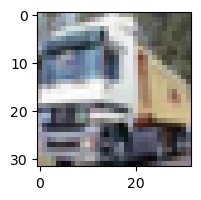

In [3]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[1])

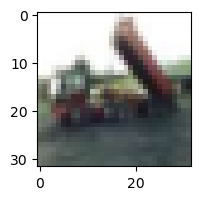

In [4]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[2])

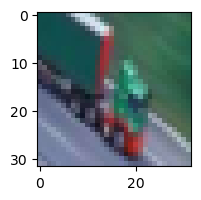

In [5]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[50])

In [6]:
X_train= X_train / 255
X_test= X_test / 255

In [7]:
X_train.shape

(50000, 32, 32, 3)

In [10]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
y_train.shape

(50000, 1)

In [11]:
#Converting data to one dimensional array
y_train= y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [12]:
y_test= y_test.reshape(-1,)

# Using ANN

In [23]:
ann= models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(6000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 253s 162ms/step - loss: 2.0109 - accuracy: 0.3259
Epoch 2/10
1563/1563 [==============================] - 256s 164ms/step - loss: 1.6854 - accuracy: 0.3976
Epoch 3/10
1563/1563 [==============================] - 256s 164ms/step - loss: 1.6020 - accuracy: 0.4302
Epoch 4/10
1563/1563 [==============================] - 244s 156ms/step - loss: 1.5511 - accuracy: 0.4480
Epoch 5/10
1563/1563 [==============================] - 247s 158ms/step - loss: 1.5161 - accuracy: 0.4636
Epoch 6/10
1563/1563 [==============================] - 242s 155ms/step - loss: 1.4936 - accuracy: 0.4708
Epoch 7/10
1563/1563 [==============================] - 256s 164ms/step - loss: 1.4729 - accuracy: 0.4743
Epoch 8/10
1563/1563 [==============================] - 242s 155ms/step - loss: 1.4520 - accuracy: 0.4819
Epoch 9/10
1563/1563 [==============================] - 245s 157ms/step - loss: 1.4357 - accuracy: 0.4908
Epoch 10/10
1563/1563 [=======================

In [ ]:
ann.evaluate(X_test, y_test)

In [ ]:
y_pred_ann= model.predict(X_test)
y_predict_labels= [np.argmax(i) for i in y_pred]

cm= tf.math.confusion_matrix(labels=y_test, predictions=y_predict_labels)
sns.heatmap(cm, annot=True, fmt='d').predict(X_test)
y_predict_labels= [np.argmax(i) for i in y_pred]

cm= tf.math.confusion_matrix(labels=y_test, predictions=y_predict_labels)
sns.heatmap(cm, annot=True, fmt='d')

# Using SGD optimizer

In [24]:
model= models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='SGD',
             loss= 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 33s 21ms/step - loss: 2.0007 - accuracy: 0.2709
Epoch 2/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.5936 - accuracy: 0.4275
Epoch 3/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.4101 - accuracy: 0.5004
Epoch 4/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.3030 - accuracy: 0.5393
Epoch 5/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.2203 - accuracy: 0.5697
Epoch 6/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.1511 - accuracy: 0.5969
Epoch 7/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.0958 - accuracy: 0.6179
Epoch 8/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.0474 - accuracy: 0.6365
Epoch 9/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.0040 - accuracy: 0.6543
Epoch 10/10
1563/1563 [==============================] - 28s 18m

In [25]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.0301 - accuracy: 0.6423


[1.0301159620285034, 0.642300009727478]

313/313 [==============================] - 2s 6ms/step


<Axes: >

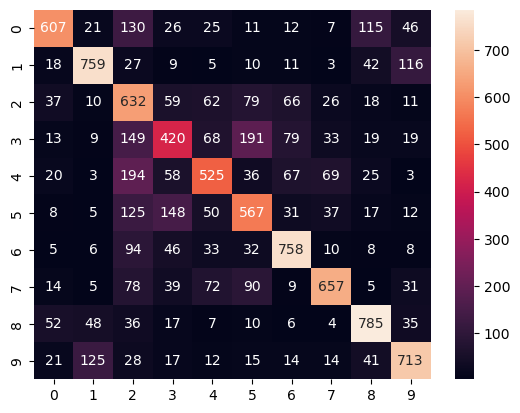

In [34]:
y_pred= model.predict(X_test)
y_predict_labels= [np.argmax(i) for i in y_pred]

cm= tf.math.confusion_matrix(labels=y_test, predictions=y_predict_labels)
sns.heatmap(cm, annot=True, fmt='d')

In [39]:
print(classification_report(y_test, y_predict_labels))

              precision    recall  f1-score   support

           0       0.76      0.61      0.68      1000
           1       0.77      0.76      0.76      1000
           2       0.42      0.63      0.51      1000
           3       0.50      0.42      0.46      1000
           4       0.61      0.53      0.56      1000
           5       0.54      0.57      0.56      1000
           6       0.72      0.76      0.74      1000
           7       0.76      0.66      0.71      1000
           8       0.73      0.79      0.76      1000
           9       0.72      0.71      0.72      1000

    accuracy                           0.64     10000
   macro avg       0.65      0.64      0.64     10000
weighted avg       0.65      0.64      0.64     10000



# Using Adam optimizer

In [14]:
model_adam= models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

model_adam.compile(optimizer='adam',
             loss= 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

model_adam.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.5150 - accuracy: 0.4519
Epoch 2/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.1415 - accuracy: 0.5992
Epoch 3/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.0133 - accuracy: 0.6450
Epoch 4/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9351 - accuracy: 0.6736
Epoch 5/10
1563/1563 [==============================] - 27s 18ms/step - loss: 0.8744 - accuracy: 0.6955
Epoch 6/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8241 - accuracy: 0.7150
Epoch 7/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.7775 - accuracy: 0.7297
Epoch 8/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.7439 - accuracy: 0.7429
Epoch 9/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.7048 - accuracy: 0.7542
Epoch 10/10
1563/1563 [==============================] - 30s 19m

In [15]:
model_adam.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.9304 - accuracy: 0.6971


[0.9303798079490662, 0.6970999836921692]

313/313 [==============================] - 2s 6ms/step


<Axes: >

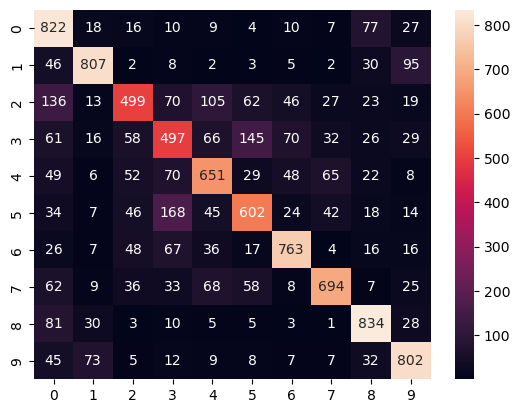

In [19]:
y_pred_adam= model_adam.predict(X_test)
y_pred_labelsa= [np.argmax(i) for i in y_pred_adam]

cm= tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labelsa)
sns.heatmap(cm, annot=True, fmt='d')

In [20]:
print(classification_report(y_test, y_pred_labelsa))

              precision    recall  f1-score   support

           0       0.60      0.82      0.70      1000
           1       0.82      0.81      0.81      1000
           2       0.65      0.50      0.57      1000
           3       0.53      0.50      0.51      1000
           4       0.65      0.65      0.65      1000
           5       0.65      0.60      0.62      1000
           6       0.78      0.76      0.77      1000
           7       0.79      0.69      0.74      1000
           8       0.77      0.83      0.80      1000
           9       0.75      0.80      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000

